### Melange de Lois 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

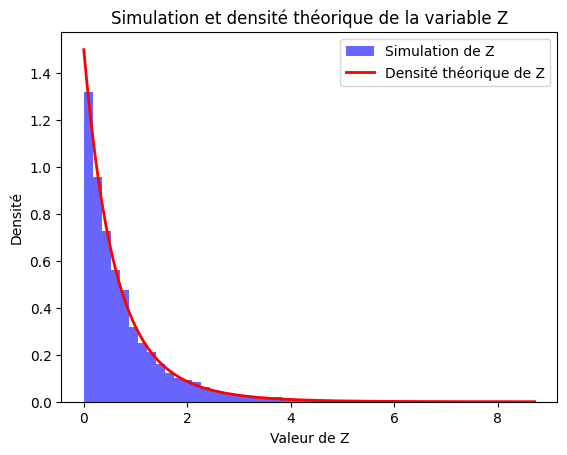

In [2]:
# Paramètres des lois exponentielles
lambda_ = 1
mu = 2
n_simulations = 10000  # Nombre de simulations

# Simulations de la variable Z
Z_values = []
for _ in range(n_simulations):
    u = npr.rand()
    p = npr.rand()
    
    # Génération des variables exponentielles X et Y
    X = -(1 / lambda_) * np.log(u)
    Y = -(1 / mu) * np.log(u)
    
    # Simulation de la variable C
    C = (p <= 0.5) * 1  # Choisir entre X et Y avec probabilité égale
    
    # Calcul de Z en fonction de C
    Z = C * X + (1 - C) * Y
    Z_values.append(Z)

# Histogramme de Z simulé
plt.hist(Z_values, bins=50, density=True, alpha=0.6, color='blue', label="Simulation de Z")

# Densité théorique de Z
z = np.linspace(0, max(Z_values), 1000)  # Valeurs de Z pour tracer la densité
f_Z = 0.5 * lambda_ * np.exp(-lambda_ * z) + 0.5 * mu * np.exp(-mu * z)  # Densité théorique

# Superposition de la densité théorique
plt.plot(z, f_Z, color='red', linewidth=2, label="Densité théorique de Z")

# Configuration du graphique
plt.title("Simulation et densité théorique de la variable Z")
plt.xlabel("Valeur de Z")
plt.ylabel("Densité")
plt.legend()
plt.show()


### Question 6

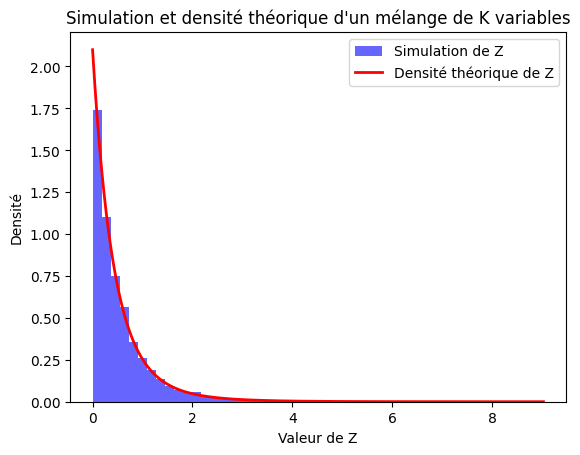

In [3]:
# Paramètres
K = 3  
lambdas = [1, 2, 3]  # Paramètres des lois exponentielles
proportions = [0.2, 0.5, 0.3]  # Proportions p1, p2, ..., pK
n_simulations = 10000  # Nombre de simulations

# Vérification que les proportions s'additionnent à 1
assert np.isclose(sum(proportions), 1), "Les proportions doivent s'additionner à 1."

# Simulation de la variable Z
Z_values = []
for _ in range(n_simulations):
    # Choisir une variable selon les proportions
    C = npr.choice(K, p=proportions)
    
    # Générer une réalisation de X_C
    u = npr.rand()
    X_C = -(1 / lambdas[C]) * np.log(u)  # Loi exponentielle pour X_C
    
    # Ajouter X_C aux valeurs de Z
    Z_values.append(X_C)

# Histogramme des valeurs simulées de Z
plt.hist(Z_values, bins=50, density=True, alpha=0.6, color='blue', label="Simulation de Z")

# Densité théorique de Z
z = np.linspace(0, max(Z_values), 1000)  # Valeurs de Z pour tracer la densité
f_Z = np.zeros_like(z)  # Initialiser la densité
for i in range(K):
    f_Z += proportions[i] * lambdas[i] * np.exp(-lambdas[i] * z)  # Ajouter chaque composante pondérée

# Superposition de la densité théorique
plt.plot(z, f_Z, color='red', linewidth=2, label="Densité théorique de Z")

# Configuration du graphique
plt.title("Simulation et densité théorique d'un mélange de K variables")
plt.xlabel("Valeur de Z")
plt.ylabel("Densité")
plt.legend()
plt.show()


In [4]:
# Paramètres des lois exponentielles
lambda_X = 1 / 2  # Paramètre de X
mu_Y = 1 / 4      # Paramètre de Y
p_X = 1 / 3       # Proportion de X
p_Y = 2 / 3       # Proportion de Y

# Données simulées
data = [4.02, 0.33, 0.86, 0.67, 0.86, 0.80, 4.43, 1.09, 3.75, 0.85, 3.09, 5.17, 1.09, 2.85, 6.76]

# Calcul des probabilités pour chaque donnée
results = []
for z in data:
    # Densités
    f_X = lambda_X * np.exp(-lambda_X * z)
    f_Y = mu_Y * np.exp(-mu_Y * z)
    
    # Probabilités a posteriori
    P_X_sachan_Z = p_X * f_X / (p_X * f_X + p_Y * f_Y)
    P_Y_sachan_Z = p_Y * f_Y / (p_X * f_X + p_Y * f_Y)
    
    # Ajouter les résultats
    results.append((z, P_X_sachan_Z, P_Y_sachan_Z))

# Affichage des résultats
print("Valeur de Z | P(X|Z)   | P(Y|Z)")
print("--------------------------------")
for z, p_x, p_y in results:
    print(f"{z:>11.2f} | {p_x:.6f} | {p_y:.6f}")


Valeur de Z | P(X|Z)   | P(Y|Z)
--------------------------------
       4.02 | 0.267959 | 0.732041
       0.33 | 0.479387 | 0.520613
       0.86 | 0.446456 | 0.553544
       0.67 | 0.458223 | 0.541777
       0.86 | 0.446456 | 0.553544
       0.80 | 0.450166 | 0.549834
       4.43 | 0.248337 | 0.751663
       1.09 | 0.432293 | 0.567707
       3.75 | 0.281406 | 0.718594
       0.85 | 0.447074 | 0.552926
       3.09 | 0.315939 | 0.684061
       5.17 | 0.215430 | 0.784570
       1.09 | 0.432293 | 0.567707
       2.85 | 0.329047 | 0.670953
       6.76 | 0.155776 | 0.844224


## Algorithme EM

In [5]:
# Fonction pour simuler Z
def simul_Z(lambda_, mu, p, n_simulations):
    Z_values = []
    for _ in range(n_simulations):
        # Génération des variables exponentielles X et Y
        X = -(1 / lambda_) * np.log(npr.rand())
        Y = -(1 / mu) * np.log(npr.rand())
        
        # Variable C choisie avec probabilité p
        C = npr.rand() <= p
        Z = C * X + (1 - C) * Y
        Z_values.append(Z)
    return np.array(Z_values)


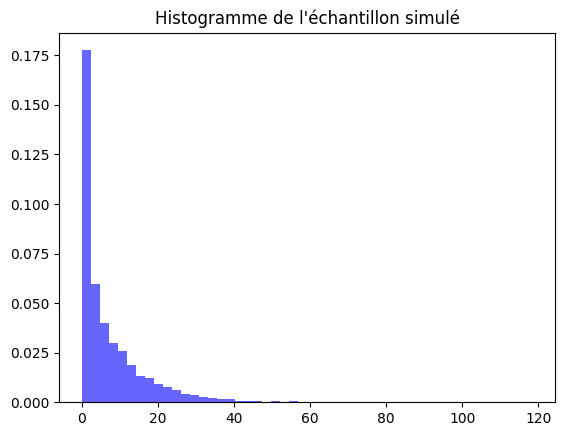

In [6]:
lambda_ = 1
mu_ = 0.1
p = 0.3
n_simulations = 10000
Z_echantillon = simul_Z(lambda_, mu_,p, n_simulations)


# Visualisation de l'échantillon simulé
plt.hist(Z_echantillon, bins=50, density=True, alpha=0.6, color='blue')
plt.title("Histogramme de l'échantillon simulé")
plt.show()

In [7]:
# Initialisation des paramètres de theta_prime
lambda_prime = 2
mu_prime = 0.5
p_prime = 0.5

# Tolérance pour la convergence
tol = 1e-6
max_iterations = 1000

# Algorithme EM
for iteration in range(max_iterations):
    # densité de X
    densite_X = lambda_prime * np.exp(-lambda_prime * Z_echantillon)
    # densité de Y
    densite_Y = mu_prime * np.exp(-mu_prime * Z_echantillon)
    
    # la proba conditionnelle
    proba_theta = p_prime * densite_X / (p_prime * densite_X + (1 - p_prime) * densite_Y)
    
    # Mise à jour des paramètres
    p_new = np.mean(proba_theta)
    lambda_new = np.sum(proba_theta) / np.sum(proba_theta * Z_echantillon)
    mu_new = np.sum(1 - proba_theta) / np.sum((1 - proba_theta) * Z_echantillon)
    
    # Vérification de la convergence
    if (np.abs(p_new - p_prime) < tol and
        np.abs(lambda_new - lambda_prime) < tol and
        np.abs(mu_new - mu_prime) < tol):
        break
    
    # Mise à jour des paramètres pour l'itération suivante
    p_prime, lambda_prime, mu_prime = p_new, lambda_new, mu_new

# Résultats finaux
print(f"Paramètres estimés après {iteration + 1} itérations :")
print(f"p = {p_prime:.6f}, lambda = {lambda_prime:.6f}, mu = {mu_prime:.6f}")

Paramètres estimés après 82 itérations :
p = 0.295436, lambda = 1.030671, mu = 0.101241


### Melange de loi gaussienne

(array([0.00023521, 0.00070563, 0.00188169, 0.00258732, 0.00799716,
        0.02399149, 0.0461013 , 0.07150406, 0.11125467, 0.12325042,
        0.11572368, 0.0964364 , 0.07432659, 0.05080552, 0.04351398,
        0.04962946, 0.05668578, 0.07573785, 0.09925893, 0.1009054 ,
        0.10866735, 0.09690682, 0.08655755, 0.07691391, 0.06280126,
        0.05527452, 0.0416323 , 0.03975061, 0.04633651, 0.05151115,
        0.05386326, 0.0526872 , 0.06162521, 0.06538858, 0.05833226,
        0.06186042, 0.0482182 , 0.0461013 , 0.02751965, 0.01881686,
        0.01246617, 0.01176054, 0.00705632, 0.00305774, 0.00235211,
        0.00070563, 0.00023521, 0.00094084, 0.        , 0.00023521]),
 array([-2.14699962, -1.72184894, -1.29669826, -0.87154758, -0.44639689,
        -0.02124621,  0.40390447,  0.82905516,  1.25420584,  1.67935652,
         2.1045072 ,  2.52965789,  2.95480857,  3.37995925,  3.80510994,
         4.23026062,  4.6554113 ,  5.08056198,  5.50571267,  5.93086335,
         6.35601403,  6.78

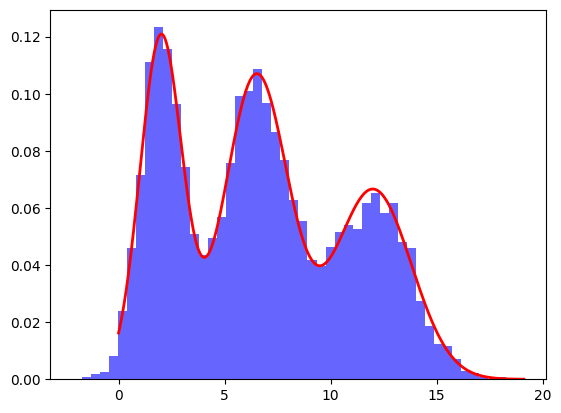

In [8]:
# Paramètres
mu_true = [2, 6.5, 12]
sigma_true = [1, 1.5, 1.8]
proportion_true = [0.3, 0.4, 0.3]
n_simulations = 10000
K = 3

# Simulation de la variable Z
Z_values = []
for _ in range(n_simulations):
    # Choisir une composante selon les proportions
    C = npr.choice(K, p=proportion_true)
    # Générer une valeur de Z selon la loi normale choisie
    Z = np.random.normal(mu_true[C], sigma_true[C])
    Z_values.append(Z)
    
#la densité de Z
z = np.linspace(0, max(Z_values), 1000) 
f_z = np.zeros_like(z)
for i in range(K):
    f_z = f_z + proportion_true[i]*(1/np.sqrt(2 * np.pi * sigma_true[i]**2))* np.exp(-((z-mu_true[i])**2)/(2 * sigma_true[i]**2))

# Superposition de la densité théorique
plt.plot(z, f_z, color='red', linewidth=2, label="Densité théorique de Z")
plt.hist(Z_values,bins=50, density=True, alpha=0.6, color='blue')

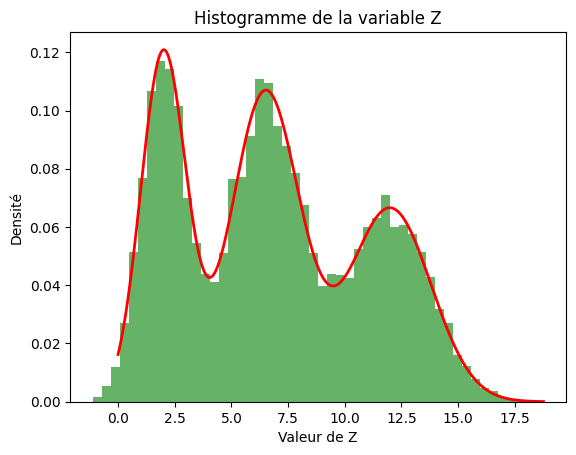

In [9]:
#Autrement  en definissant une fonction
def Z_echantillon(mu_true,sigma_true,proportion_true,n_simulations):
    # Générer les indices des composantes selon les proportions
    C = np.random.choice(K, size=n_simulations, p=proportion_true)

    # Générer des valeurs pour chaque composante
    Z1 = npr.normal(mu_true[0], sigma_true[0], n_simulations)
    Z2 = npr.normal(mu_true[1], sigma_true[1], n_simulations)
    Z3 = npr.normal(mu_true[2], sigma_true[2], n_simulations)

    # Combiner les valeurs en utilisant np.where
    Z_values = np.where(C == 0, Z1, np.where(C == 1, Z2, Z3))
    return Z_values

Z_values = Z_echantillon(mu_true,sigma_true,proportion_true, n_simulations)

#la densité de Z
z = np.linspace(0, max(Z_values), 1000) 
f_z = np.zeros_like(z)
for i in range(K):
    f_z = f_z + proportion_true[i]*(1/np.sqrt(2 * np.pi * sigma_true[i]**2))* np.exp(-((z-mu_true[i])**2)/(2 * sigma_true[i]**2))

# Superposition de la densité théorique
plt.plot(z, f_z, color='red', linewidth=2, label="Densité théorique de Z")
# Tracer l'histogramme
plt.hist(Z_values, bins=50, density=True, alpha=0.6, color='g')

# Ajouter des titres et des étiquettes
plt.title('Histogramme de la variable Z')
plt.xlabel('Valeur de Z')
plt.ylabel('Densité')

# Afficher le graphique
plt.show()



In [10]:
K= 3
tol =1e-6
max_iterations =1000

mu_prime = [2.5, 6, 13]
sigma_prine = [1.5, 2, 2.5]
proba_prime = [1/3, 1/3, 1/3]

Z = Z_echantillon(mu_prime,sigma_prine,proba_prime,n_simulations)

def calculer_num(Z, mu_prime, sigma_prine, proba_prime):
    n = len(Z)
    K = len(mu_prime)
    num = np.zeros((n, K))

    for k in range(K):
        num[:, k] = (
            proba_prime[k]
            * (1 / np.sqrt(2 * np.pi * sigma_prine[k]**2))
            * np.exp(-((Z - mu_prime[k])**2) / (2 * sigma_prine[k]**2))
        )
    num /= num.sum(axis=1, keepdims=True)
    return num
        
def mettre_a_jour_parametres(Z, num):
    n, K = num.shape

    proba_prime = num.mean(axis=0)
    mu_prime = np.sum(num * Z[:, np.newaxis], axis=0) / np.sum(num, axis=0)
    sigma_prine = np.sqrt(
        np.sum(num * (Z[:, np.newaxis] - mu_prime)**2, axis=0) / np.sum(num, axis=0)
    )

    return mu_prime, sigma_prine, proba_prime

# Fonction de log-vraisemblance
def log_vraisemblance(Z, mu_prime, sigma_prine, proba_prime):
    n = len(Z)
    K = len(mu_prime)
    vraisemblance = 0

    for k in range(K):
        vraisemblance += (
            proba_prime[k]
            * (1 / np.sqrt(2 * np.pi * sigma_prine[k]**2))
            * np.exp(-((Z - mu_prime[k])**2) / (2 * sigma_prine[k]**2))
        )

    return np.sum(np.log(vraisemblance))


# Algorithme EM
log_vraisemblance_prec = -np.inf
for iteration in range(max_iterations):
    num = calculer_num(Z, mu_prime, sigma_prine, proba_prime)

    mu_prime, sigma_prine, proba_prime = mettre_a_jour_parametres(Z, num)

    # Calcul de la log-vraisemblance
    log_vraisemblance_actuelle = log_vraisemblance(Z, mu_prime, sigma_prine, proba_prime)

    # Critère de convergence
    if np.abs(log_vraisemblance_actuelle - log_vraisemblance_prec) < tol:
        break

    log_vraisemblance_prec = log_vraisemblance_actuelle

# Affichage des paramètres estimés
print("Paramètres estimés :")
print(f"Mu : {mu_prime}")
print(f"Sigma : {sigma_prine}")
print(f"Proportions : {proba_prime}")



Paramètres estimés :
Mu : [ 2.59264066  6.18788652 12.82739896]
Sigma : [1.50671418 1.80629702 2.59360979]
Proportions : [0.35383746 0.2995623  0.34660024]


### Melange de loi gaussien de dimension 2

In [11]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework

from scipy.stats import multivariate_normal     # for generating pdf : multivariate_normal.pdf(x, mean, cov)

In [12]:
# Chargement des données
NDbrute = []
with open("Brute.txt", "r") as fichier:
    for l in fichier:
        T = [str(d) for d in l.split(",")]
        NDbrute.append([float(T[0]), float(T[1])])

Label = []
with open("Classification.txt", "r") as fichier:
    for l in fichier:
        S = [str(d) for d in l.split(",")]
        Label.append(float(S[0]))

# Conversion en numpy arrays pour faciliter le traitement
NDbrute = np.array(NDbrute)
Label = np.array(Label)


In [13]:
x = []
y = []

for i in range (len(NDbrute)):
    x.append(NDbrute[i][0])
    y.append(NDbrute[i][1])

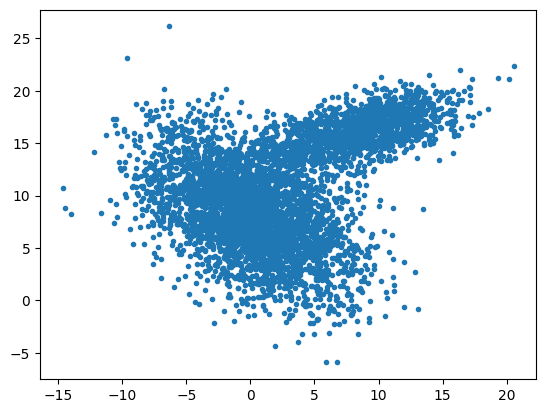

In [14]:
plt.plot(x,y,".")

In [15]:
# Initialisation des paramètres
np.random.seed(0)
K = 2  # Nombre de composantes
n, d = NDbrute.shape

# Initialisation des proportions
proportions = np.array([0.5, 0.5])

# Initialisation des moyennes aléatoires
mu = [0.10,10.15]

# Initialisation des matrices de covariance comme des matrices identités
covariances = np.array([[25,-2],[-2,24]])


In [16]:
covariances = np.array([[25,-2],[-2,24]])
covariances

array([[25, -2],
       [-2, 24]])

In [17]:
def multivariate_gaussian(x, mu, cov):
    d = len(mu)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_factor = (2 * np.pi)**(d / 2) * np.sqrt(det_cov)
    diff = x - mu
    return np.exp(-0.5 * diff.T @ inv_cov @ diff) / norm_factor

def num_gauss(NDbrute, proportions, mu, covariances):
    n = len(NDbrute)
    K = len(proportions)
    gamma = np.zeros((n, K))
    
    for k in range(K):
        for i in range(n):
            gamma[i, k] = proportions[k] * multivariate_gaussian(NDbrute[i], mu[k], covariances[k])
    
    gamma /= gamma.sum(axis=1, keepdims=True)  # Normalisation
    return gamma

def parametres(NDbrute, gamma):
    n, d = NDbrute.shape
    K = gamma.shape[1]
    
    proportions = gamma.sum(axis=0) / n
    mu = np.dot(gamma.T, NDbrute) / gamma.sum(axis=0)[:, np.newaxis]
    covariances = np.zeros((K, d, d))
    
    for k in range(K):
        diff = NDbrute - mu[k]
        covariances[k] = np.dot(gamma[:, k] * diff.T, diff) / gamma[:, k].sum()
    
    return proportions, mu, covariances


In [18]:
tol = 1e-6
max_iterations = 100
log_likelihood = []

for iteration in range(max_iterations):

    gamma = num_gauss(NDbrute, proportions, mu, covariances)
    

    proportions, mu, covariances = parametres(NDbrute, gamma)
    
    # Calcul de la log-vraisemblance
    ll = np.sum([
        np.log(np.sum([
            proportions[k] * multivariate_gaussian(x, mu[k], covariances[k]) for k in range(K)
        ])) for x in NDbrute
    ])
    log_likelihood.append(ll)
    
    # Critère de convergence
    if iteration > 0 and np.abs(log_likelihood[-1] - log_likelihood[-2]) < tol:
        break


TypeError: object of type 'float' has no len()

In [ ]:
# Classification des points
predicted_labels = np.argmax(gamma, axis=1)

# Comparaison avec les labels
accuracy = np.mean(predicted_labels == Label)
print(f"Précision : {accuracy:.2f}")


Précision : 0.28
